# <center> ARIMAX (Auto Regressive Integrated Moving Average with Exogenous variables) modelling in Python <center>

#### Basic ARIMA:

As implied by its shortened acronym, the pure ARIMA model-building methodology employs only lagged values of the dependent variable (i.e., AR terms) and lagged values of errors previously produced by the model (i.e., MA terms). 
The I in ARIMA refers to integrated and indicates that the dependent variable time series has been differenced one or more times to make the time series stationary before model building begins.

#### Introduction to ARIMAX:

An Autoregressive Integrated Moving Average with Explanatory variable (ARIMAX) model is basically an ARIMA model with one or more explanatory/independent variables also known as Exogenous variables.

#### Parameters in ARIMAX:

There are basically 3 parameters in an ARIMAX model: p,d,q
Values of p and q are determined based on the autocorrelation and partial autocorrelation plots and the value of d depends on the level of stationarity in the data.
In PACF plot, the number of spikes, above a certain reference line, decide the value of p.
In ACF plot, the number of spikes, above a certain reference line, decide the value of q.
For example:
ARIMAX(2,1,1) means that we have a second order autoregressive model with first order moving average component and the series has been differenced once to make it stationary.

Let us take a sample dataset of sales and try to understand how ARIMAX works.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [44]:
os.getcwd()

'C:\\Users\\Vighnesh Tamse\\Desktop\\Jupyter Notebook'

In [45]:
#Reading the file
df=pd.read_csv('salesdata2.csv')
print(df)

    Month    Marketing         Sales
0       1   107.284347    123.819229
1       2   214.523447    267.318463
2       3   327.159934    482.107206
3       4   437.384597    762.756909
4       5   518.389038    997.734857
..    ...          ...           ...
70     71  7589.918654   8529.339522
71     72  7771.809813  16866.334206
72     73  7840.068364  14860.740486
73     74  8022.535129  13465.360325
74     75  7809.123841   8801.807069

[75 rows x 3 columns]


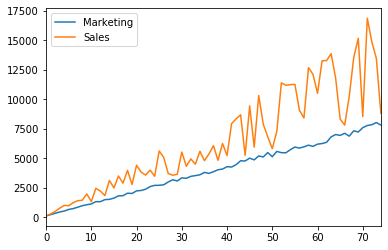

In [46]:
#Plotting the variables to check if the data is stationary
df[['Marketing','Sales']].plot()
plt.show()

From the above plot we can see that the data is not stationary. There is some upward trend in the data.

We will perform Augmented Dicky Fuller (ADF) test to check if both the series (Sales and Marketing) have unit roots or not.

In [47]:
import statsmodels.api as sm

#ADF test for Marketing series
adm = sm.tsa.stattools.adfuller(df['Marketing'])
print('ADF Statistic for Marketing: %f' % adm[0])
print('p-value: %f' % adm[1])
print('Critical Values:')
for key, value in adm[4].items():
    print('\t%s: %.3f' % (key, value))

#ADF test for Sales series
ads = sm.tsa.stattools.adfuller(df['Sales'])
print('ADF Statistic for Sales: %f' % ads[0])
print('p-value: %f' % ads[1])
print('Critical Values:')
for key, value in ads[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Marketing: 0.119736
p-value: 0.967383
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
ADF Statistic for Sales: -0.351509
p-value: 0.917886
Critical Values:
	1%: -3.539
	5%: -2.909
	10%: -2.592


We will first fit a simple regression model

In [51]:
df['const']=1
model1=sm.OLS(endog=df['Sales'],exog=df[['Marketing','const']])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     403.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):           1.79e-31
Time:                        22:54:05   Log-Likelihood:                -661.83
No. Observations:                  75   AIC:                             1328.
Df Residuals:                      73   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Marketing      1.7029      0.085     20.096      0.0

**Observe the warnings:** There is a presence of strong multicollinearity in the data. This is due to the presence of trend in the data.

Now we will do first order differencing and observe the results.

In [53]:
df['const']=1 #Adding a constant
df['diffS']=df['Sales'].diff() #First order differencing for Sales
df['diffM']=df['Marketing'].diff() #First order differencing for Marketing

#Fitting the model on the differenced data
model2=sm.OLS(endog=df['diffS'].dropna(),exog=df[['diffM','const']].dropna())
results2=model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  diffS   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.708
Date:                Tue, 14 Jan 2020   Prob (F-statistic):              0.104
Time:                        22:54:32   Log-Likelihood:                -671.02
No. Observations:                  74   AIC:                             1346.
Df Residuals:                      72   BIC:                             1351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
diffM          2.6104      1.586      1.646      0.1

This model also doesn't give us correct results as the AIC value has increased. So we can't say much.

Now we will plot ACF and PACF plots in order to get the order of MA and AR respectively

C:\Program Files (x86)\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


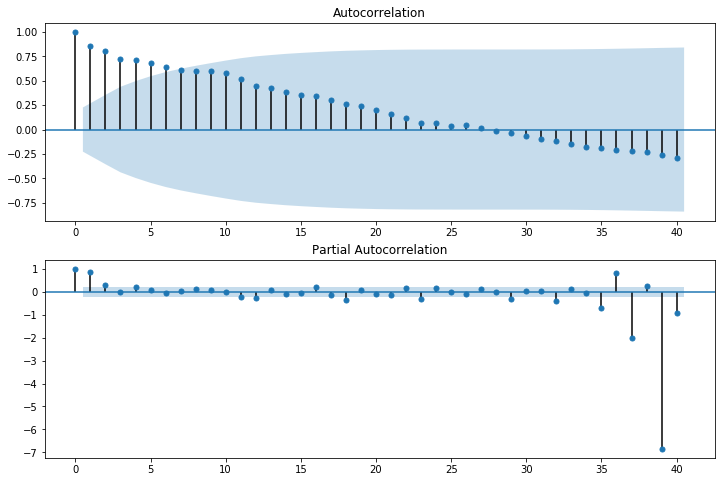

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'], lags=40, ax=ax2)
plt.show()

C:\Program Files (x86)\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


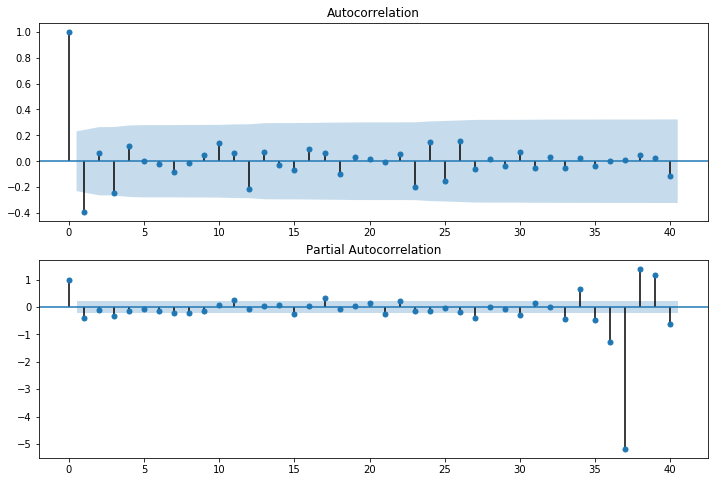

In [55]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales'].diff().dropna(), lags=40, ax=ax2)
plt.show()

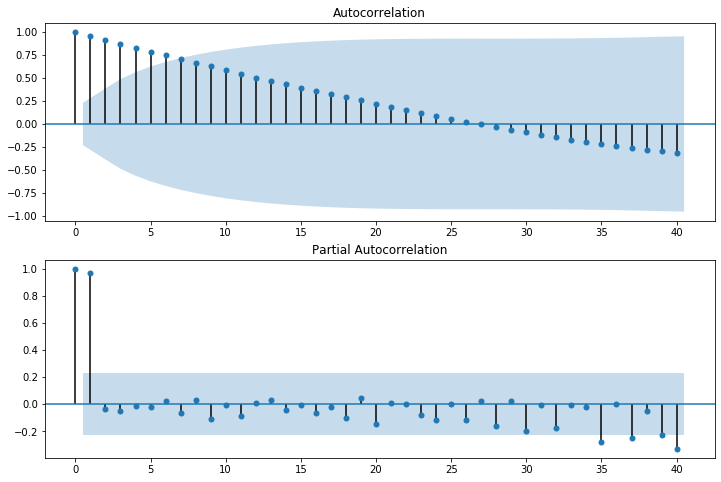

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Marketing'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Marketing'], lags=40, ax=ax2)
plt.show()

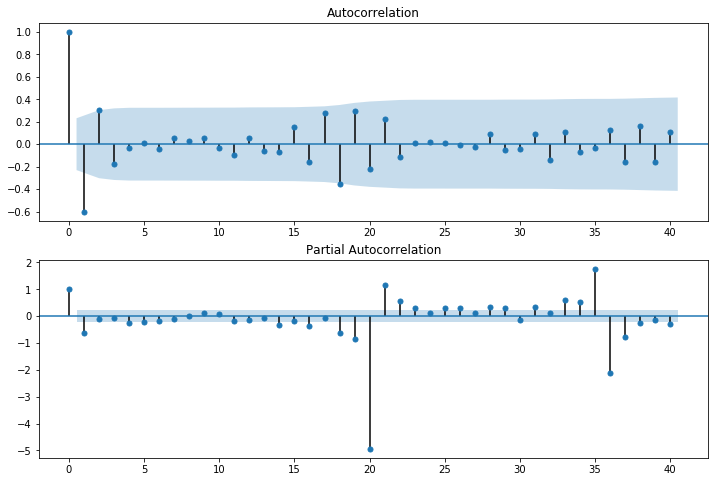

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Marketing variable
fig = sm.graphics.tsa.plot_acf(df['Marketing'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Marketing'].diff().dropna(), lags=40, ax=ax2)
plt.show()

Fitting the ARIMAX model:

In [65]:
df['lag']=df['diffM'].shift()
df.dropna(inplace=True)
model3=sm.tsa.ARIMA(endog=df['Sales'],exog=df[['lag']],order=[6,1,0])
results3=model3.fit()
print(results3.summary())

C:\Program Files (x86)\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files (x86)\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   64
Model:                 ARIMA(6, 1, 0)   Log Likelihood                -571.096
Method:                       css-mle   S.D. of innovations           1797.785
Date:                Wed, 15 Jan 2020   AIC                           1160.192
Time:                        00:48:52   BIC                           1179.622
Sample:                             1   HQIC                          1167.846
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           504.2909    230.200      2.191      0.033      53.107     955.475
lag              -3.0382      2.069     -1.468      0.148      -7.094       1.017
ar.L1.D.Sales    -0.7704      0.145     